In [1]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.special import stdtrit

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")

In [2]:

print("Avg significance, avg number of deviations, avg percentage of stat. signif. comparison")
print(df['AvgSignificance'].mean())
print(df["AvgNumberDev"].mean())
print(df["PerSignif"].mean())


Avg significance, avg number of deviations, avg percentage of stat. signif. comparison
3.129700867352771
25.42066200517428
19.29149032269879


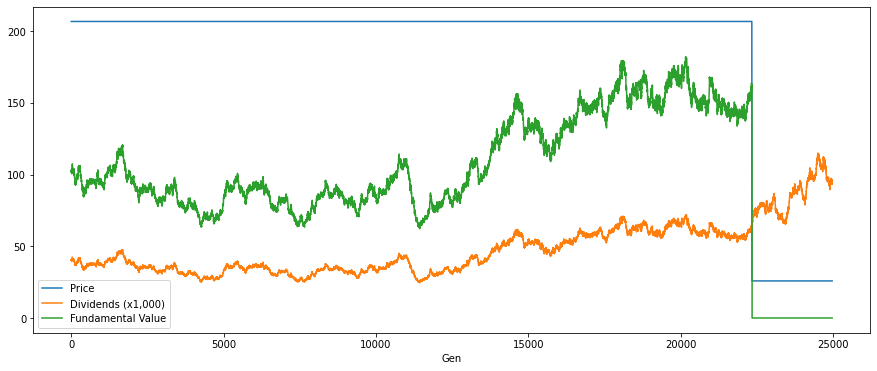

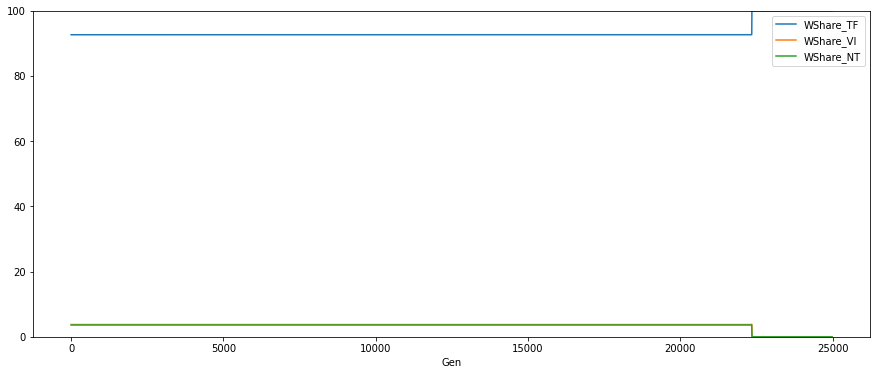

In [3]:
df['Fundamental Value'] = df['Mean_VI']
df['Dividends (x1,000)'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'Fundamental Value'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

Annual Sharpe ratios 
0.6684379533373601 0.7751942390567338 0.16663123262540758
Annual mean returns  
[0.007354405545246324, 0.007414171565311287, 0.004928473885986165]
Annual std returns
[0.011002375775533741, 0.009564275883077957, 0.02957713153971281]
Exponent of time required to detect, NTvsTF
[0.006998380305744751, 0.0063709822211236175, 50.3093462017918, 0.009453566902889938]
2.197565457931739


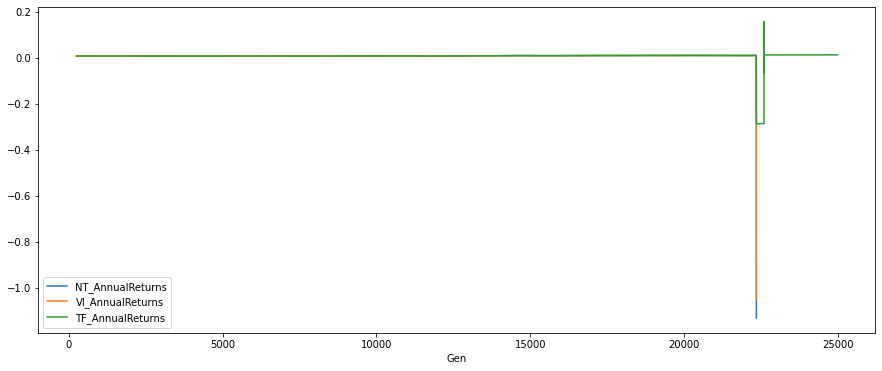

In [4]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])



print("Exponent of time required to detect, NTvsTF")
T = len(df['Gen'])
SENT = np.sqrt((1 + 0.5 * SharpeNT ** 2)/T)
SETF = np.sqrt((1 + 0.5 * SharpeTF ** 2)/T)
Pooled = (SENT + SETF) / np.sqrt(2)

if SharpeNT < SharpeTF:
        DS = SharpeTF - SharpeNT
        boundTF = SharpeTF - 1.96 * SETF
        boundNT = SharpeNT + 1.96 * SENT
        S = (abs(boundTF - boundNT)) / Pooled
else:
        DS = SharpeNT - SharpeTF
        boundTF = SharpeTF + 1.96 * SETF
        boundNT = SharpeNT - 1.96 * SENT
        S = (abs(boundNT - boundTF)) / Pooled

print([SENT, SETF, S, Pooled])
k = np.log(T) / np.log(S / DS)
print(k)

df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()



[2.9145086380731593, 4.376924494104356, 2.2083790589328833]
[28.06162486646503, 28.042813264569038, 27.980459321489242]


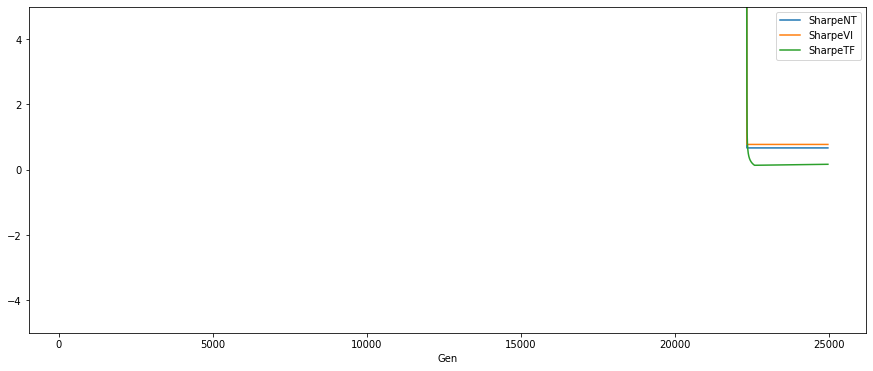

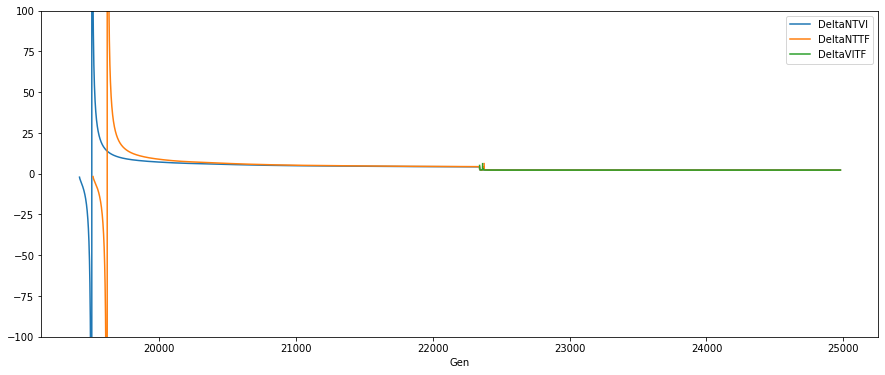

In [5]:
print([df['DeltaNTVI'].mean(),df['DeltaNTTF'].mean(),df['DeltaVITF'].mean()])
print([df['SharpeNT'].mean(),df['SharpeVI'].mean(),df['SharpeTF'].mean()])

df.plot(x="Gen", y = ["SharpeNT", "SharpeVI", "SharpeTF"],
        kind="line", figsize=(15, 6))
plt.ylim(-5,5)
plt.show()


df.plot(x="Gen", y = ["DeltaNTVI", "DeltaNTTF", "DeltaVITF"],
        kind="line", figsize=(15, 6))
plt.ylim(-100,100)
plt.show()

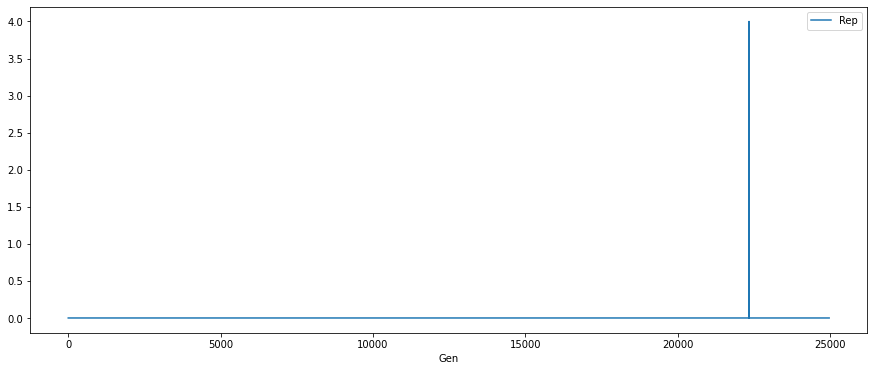

In [6]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

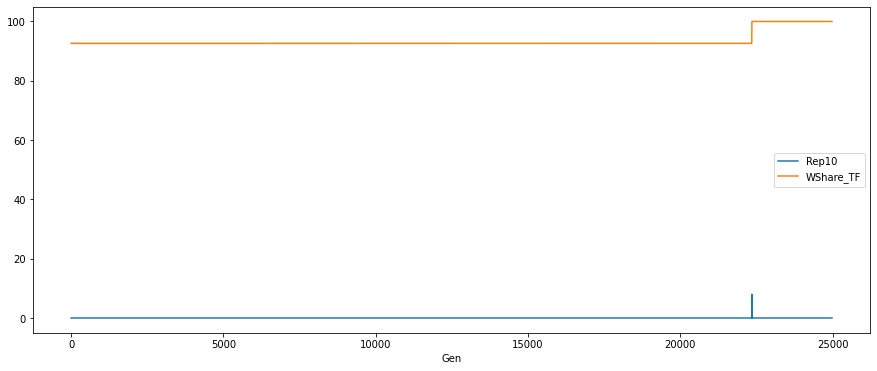

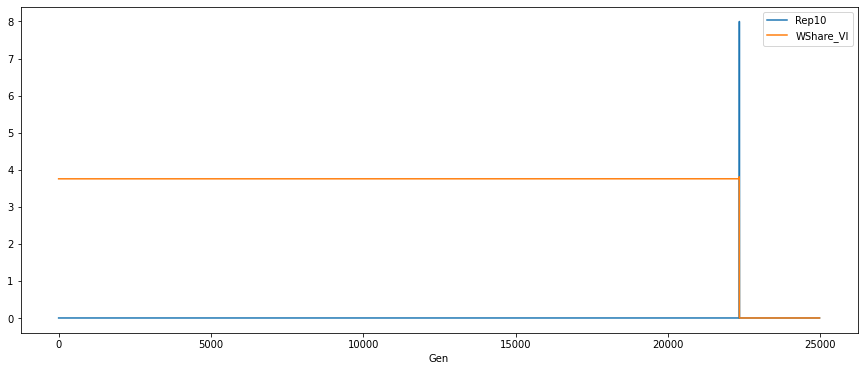

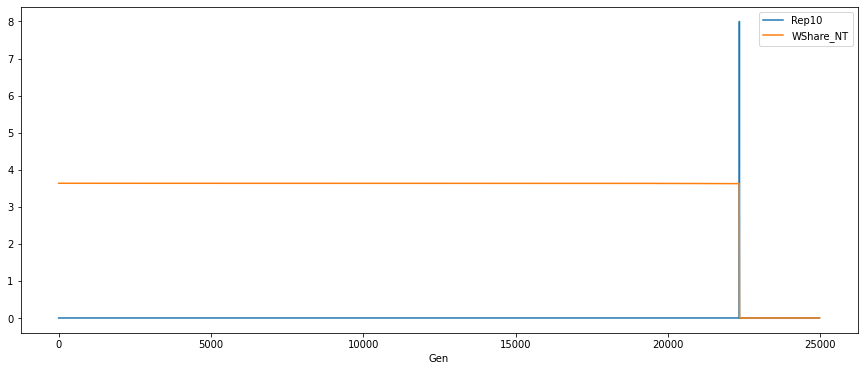

In [7]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [8]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

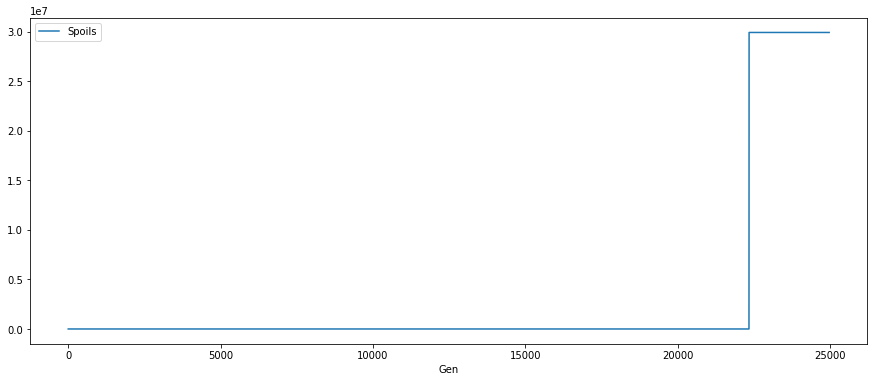

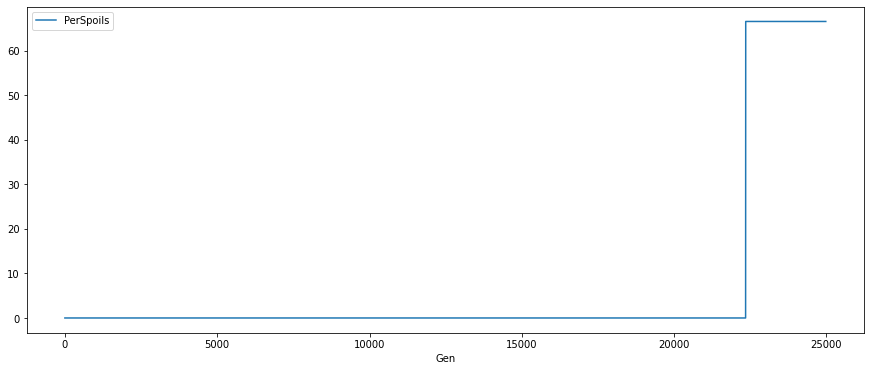

In [9]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

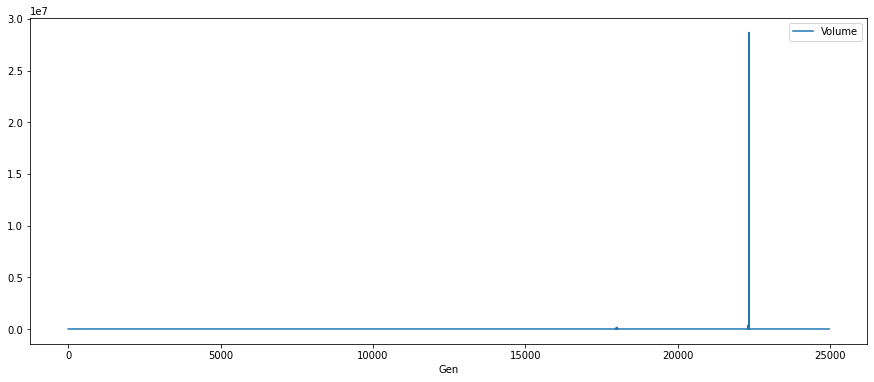

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
24974    0.0
24975    0.0
24976    0.0
24977    0.0
24978    0.0
Name: Volume, Length: 24979, dtype: float64


In [10]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

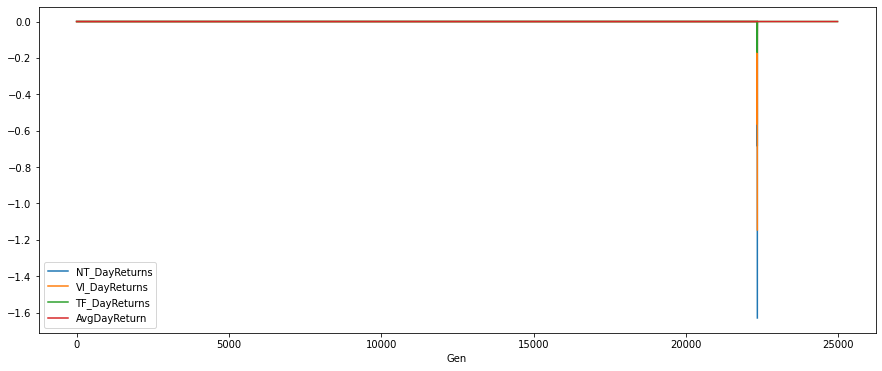

In [11]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

3.129700867352771


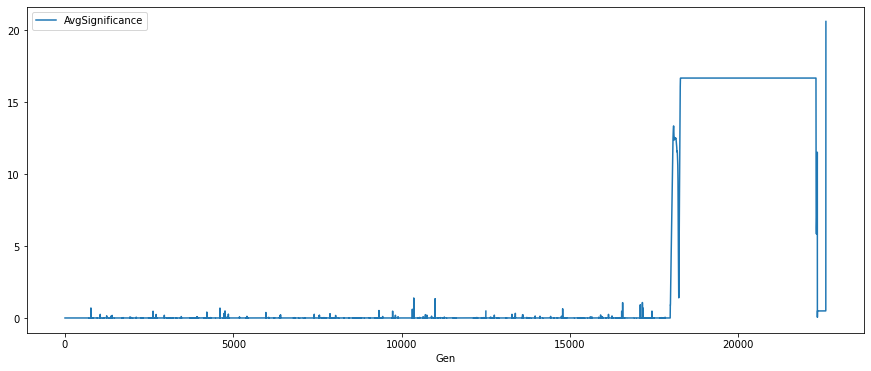

In [12]:
if df['AvgSignificance'].sum() != 0:

        print(df['AvgSignificance'].mean())

        df.plot(x="Gen", y = ["AvgSignificance"],
                kind="line", figsize=(15, 6))
        plt.show()


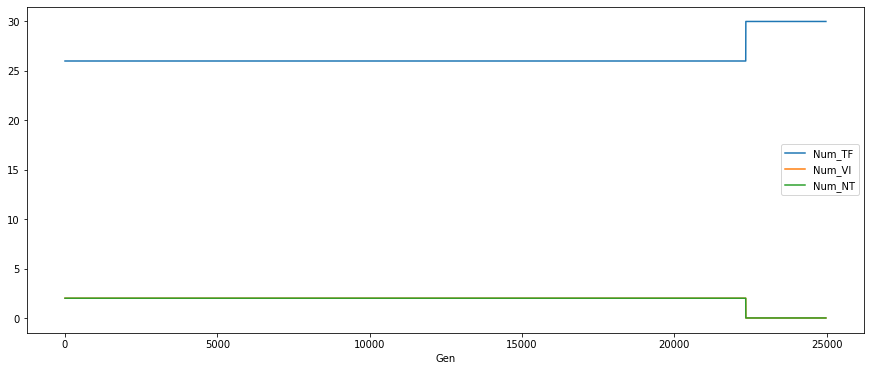

In [13]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


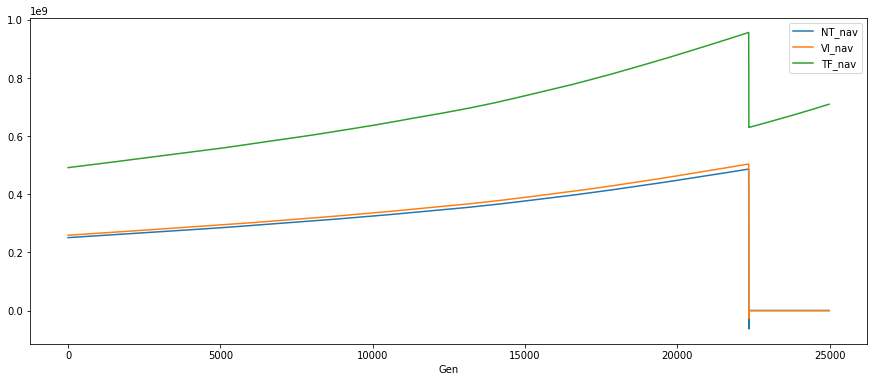

In [14]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


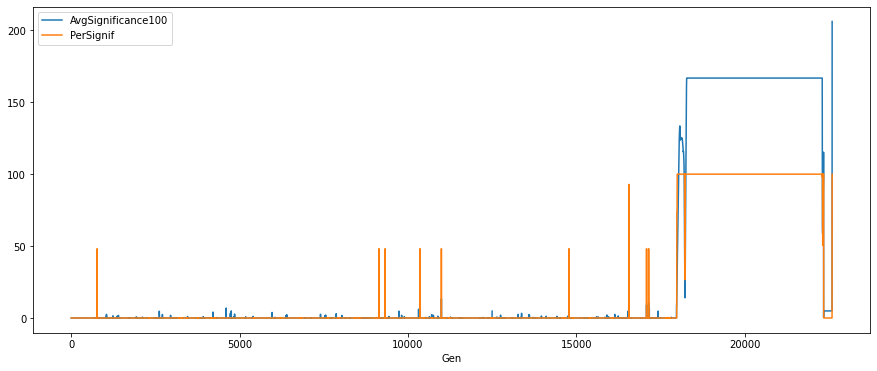

In [15]:
if df['AvgSignificance'].sum() != 0:
        df['AvgSignificance100'] = 10 * df["AvgSignificance"]

        df.plot(x="Gen", y = ["AvgSignificance100", "PerSignif"],
                kind="line", figsize=(15, 6))
        plt.show()

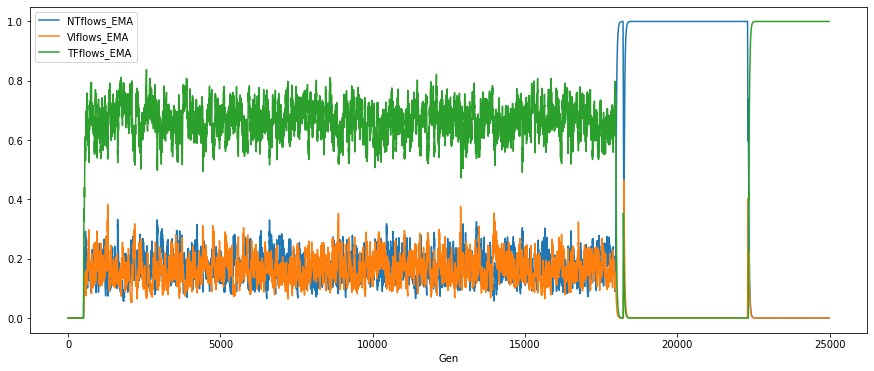

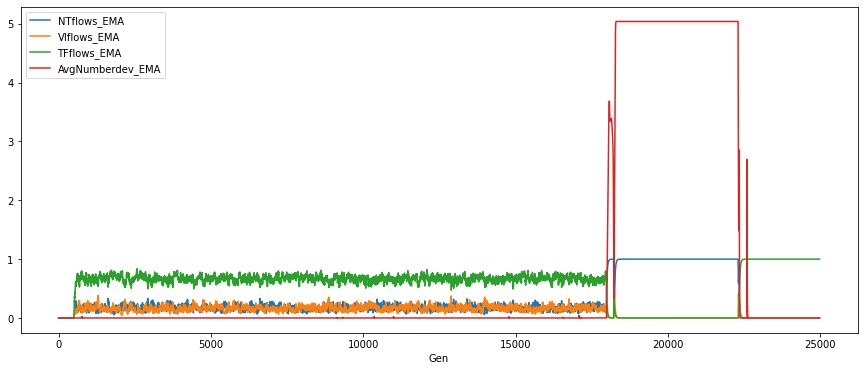

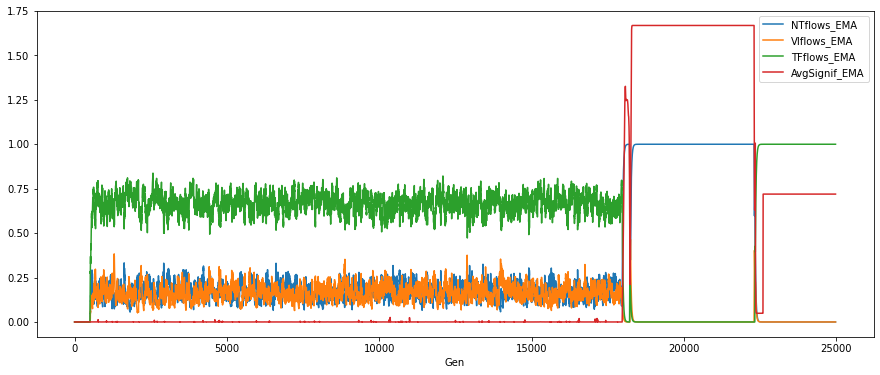

In [16]:
# df.plot(x="Gen", y = ["NTflows", "VIflows", "TFflows"],
#         kind="line", figsize=(15, 6))
# plt.show()

span = 252/5

df['NTflows_EMA'] = pd.Series.ewm(df['NTflows'], span=span).mean()
df['VIflows_EMA'] = pd.Series.ewm(df['VIflows'], span=span).mean()
df['TFflows_EMA'] = pd.Series.ewm(df['TFflows'], span=span).mean()

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()



df['AvgNumberdev_EMA'] = pd.Series.ewm(df['AvgNumberDev'], span=span/5).mean() / 30

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgNumberdev_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df['AvgSignif_EMA'] = pd.Series.ewm(df['AvgSignificance'], span=span/5).mean() / 10

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgSignif_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

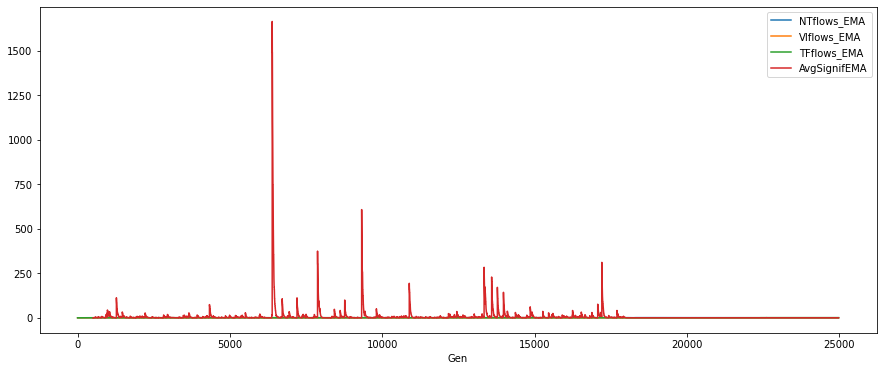

In [17]:
df['AvgSignifEMA'] = pd.Series.ewm(df['AvgSignificance'].pct_change(), span=span).mean() 
# df['AvgSignifEMA'] = df['AvgSignificance'].pct_change(periods=21) / 1000


df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgSignifEMA"],
        kind="line", figsize=(15, 6))
plt.show()

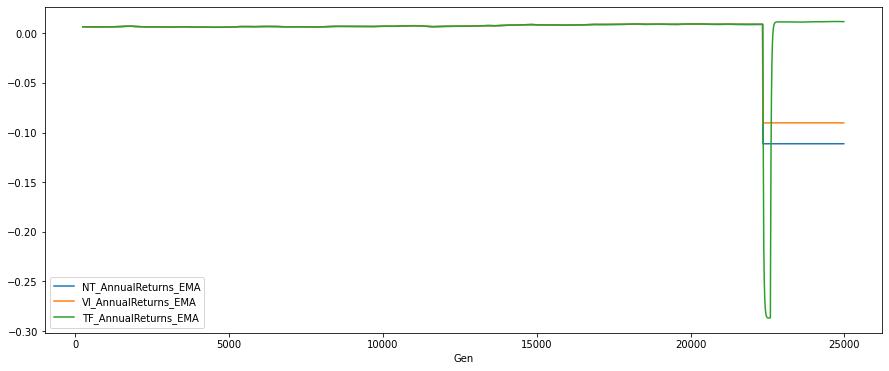

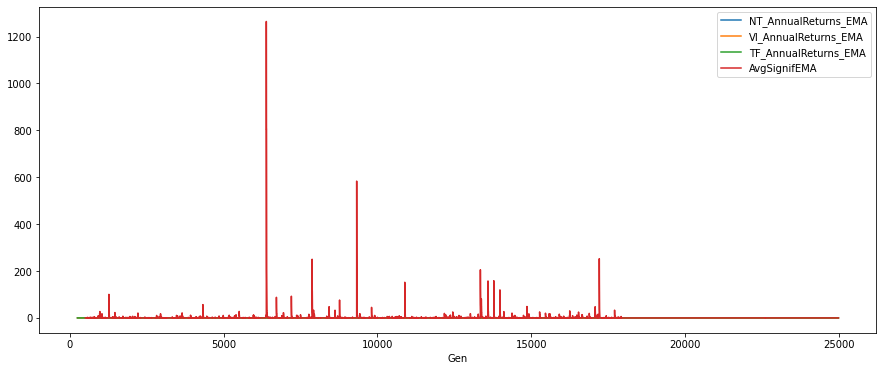

In [18]:

df['NT_AnnualReturns_EMA'] = pd.Series.ewm(df['NT_AnnualReturns'], span=span).mean()
df['VI_AnnualReturns_EMA'] = pd.Series.ewm(df['VI_AnnualReturns'], span=span).mean()
df['TF_AnnualReturns_EMA'] = pd.Series.ewm(df['TF_AnnualReturns'], span=span).mean()

df.plot(x="Gen", y = ["NT_AnnualReturns_EMA", "VI_AnnualReturns_EMA", "TF_AnnualReturns_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df['AvgSignifEMA'] = df['AvgSignificance'].pct_change(periods=252) / 10000

df['AvgSignifEMA'] = pd.Series.ewm(df['AvgSignificance'].pct_change(), span=span/5).mean()  / 5

df.plot(x="Gen", y = ["NT_AnnualReturns_EMA", "VI_AnnualReturns_EMA", "TF_AnnualReturns_EMA", "AvgSignifEMA"],
        kind="line", figsize=(15, 6))
plt.show()

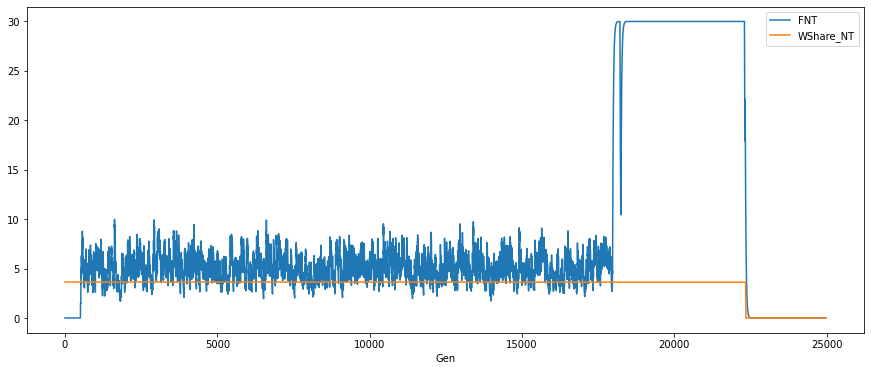

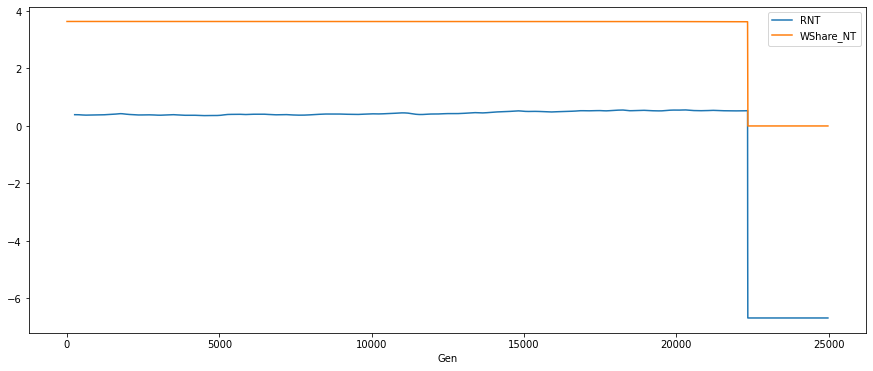

0.23450670701097298
0.98327173002717


' its like there are support lines '

In [19]:
df['FNT'] = df['NTflows_EMA'] * 30
df['RNT'] = df["NT_AnnualReturns_EMA"] * 60
df.plot(x="Gen", y = ["FNT", "WShare_NT"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y = ["RNT", "WShare_NT"],
        kind="line", figsize=(15, 6))
plt.show()
print(df['NTflows'].corr(df['WShare_NT']))
print(df['NT_AnnualReturns'].corr(df['WShare_NT']))
''' its like there are support lines '''

In [20]:
data = pd.DataFrame()
# data['NT_AnnualReturns_EMA'] = df['NT_AnnualReturns_EMA']
# data['VI_AnnualReturns_EMA'] = df['VI_AnnualReturns_EMA']
# data['TF_AnnualReturns_EMA'] = df['TF_AnnualReturns_EMA']
data['NTflows_EMA'] = df['NTflows_EMA']
data['VIflows_EMA'] = df['VIflows_EMA']
data['TFflows_EMA'] = df['TFflows_EMA']
data['AvgSignificance'] = df['AvgSignificance']
data['PerSignif'] = df['PerSignif']
print(data.corr())

# # data = pd.DataFrame()
# data['NTflows'] = df['NTflows']
# data['VIflows'] = df['VIflows']
# data['TFflows'] = df['TFflows']
# data['NT_AnnualReturns'] = df['NT_AnnualReturns']
# data['VI_AnnualReturns'] = df['VI_AnnualReturns']
# data['TF_AnnualReturns'] = df['TF_AnnualReturns']
# data.corr()

# ''' Chances of moving in the same direction '''
Total = len(df['NTflows'])


def getjoint(x, y):
    N = len(x)
    serie = []
    for i in range(N):
        if x.loc[i] > 0 and y.loc[i] > 0:
            serie.append(1)
        if x.loc[i] < 0 and y.loc[i] < 0:
            serie.append(-1)
    return serie



ChanceNTVI = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['VIflows_EMA'].pct_change())) / Total
print(ChanceNTVI)

ChanceTFVI = 100 * len(getjoint(data['TFflows_EMA'].pct_change(), data['VIflows_EMA'].pct_change())) / Total
print(ChanceTFVI)

ChanceNTTF = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['TFflows_EMA'].pct_change())) / Total
print(ChanceNTTF)

ChanceNTSig = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceNTSig)

ChanceVISig = 100 * len(getjoint(data['VIflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceVISig)

ChanceTFSig = 100 * len(getjoint(data['TFflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceTFSig)




                 NTflows_EMA  VIflows_EMA  TFflows_EMA  AvgSignificance  \
NTflows_EMA         1.000000    -0.507888    -0.890311         0.984015   
VIflows_EMA        -0.507888     1.000000     0.372319        -0.765624   
TFflows_EMA        -0.890311     0.372319     1.000000        -0.905349   
AvgSignificance     0.984015    -0.765624    -0.905349         1.000000   
PerSignif           0.985537    -0.756355    -0.909410         0.991298   

                 PerSignif  
NTflows_EMA       0.985537  
VIflows_EMA      -0.756355  
TFflows_EMA      -0.909410  
AvgSignificance   0.991298  
PerSignif         1.000000  
62.98891068497538
22.17462668641659
8.747347772128588
31.682613395252012
35.19356259257776
35.822090556067096


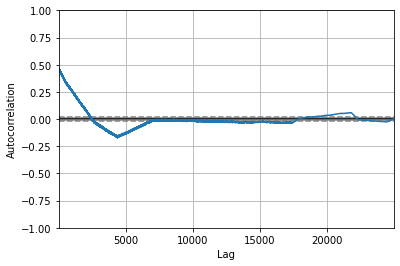

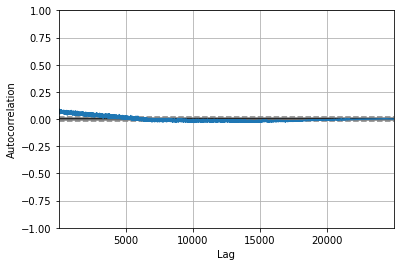

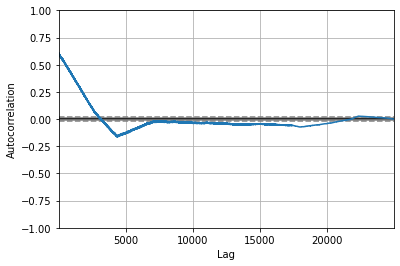

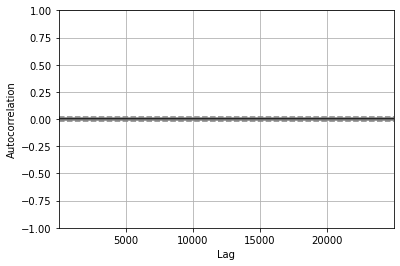

In [21]:
''' there is periodicity in flows EMA '''

x = pd.plotting.autocorrelation_plot(df['TFflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['VIflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['NTflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['AvgSignificance'])
x.plot()
plt.show()



In [22]:
from scipy.signal import periodogram


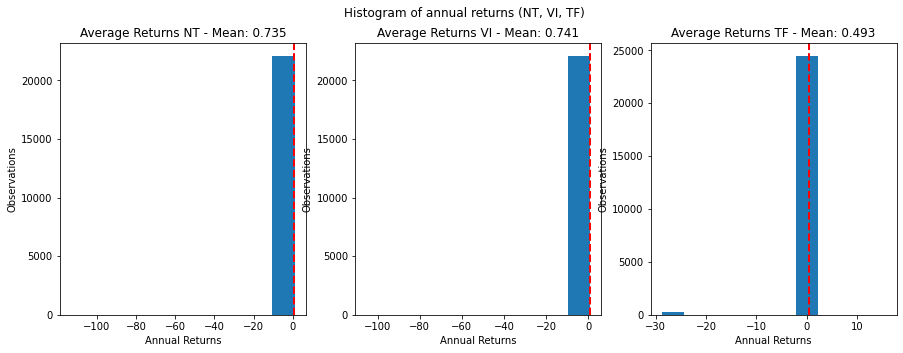

In [23]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')

ax1.hist(100 * df['NT_AnnualReturns'])
num = 100 * df['NT_AnnualReturns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.3f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(100 * df['VI_AnnualReturns'])
num = 100 * df['VI_AnnualReturns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_AnnualReturns'])
num = 100 * df['TF_AnnualReturns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations')
ax1.set_xlabel('Annual Returns')
ax2.set_ylabel('Observations')
ax2.set_xlabel('Annual Returns')
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

In [24]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

-5.562856629211129e-05
